In [212]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import numpy.linalg as lin
import time as t
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

Ans 1  Get the dataset from the file

In [213]:
# Get the data from the file
bank_data = pd.read_csv("/data_banknote_authentication (1).csv")
column    = bank_data.columns
D         = bank_data.shape[0]

Separate the input and output

In [214]:
y_value = bank_data[column[-1]].apply(pd.to_numeric)                 
y_value = y_value.to_numpy()
datam = bank_data[column[:-1]]
datam

x1        x2       x3       x4
0     3.62160   8.66610  -2.8073 -0.44699
1     4.54590   8.16740  -2.4586 -1.46210
2     3.86600  -2.63830   1.9242  0.10645
3     3.45660   9.52280  -4.0112 -3.59440
4     0.32924  -4.45520   4.5718 -0.98880
...       ...       ...      ...      ...
1367  0.40614   1.34920  -1.4501 -0.55949
1368 -1.38870  -4.87730   6.4774  0.34179
1369 -3.75030 -13.45860  17.5932 -2.77710
1370 -3.56370  -8.38270  12.3930 -1.28230
1371 -2.54190  -0.65804   2.6842  1.19520

[1372 rows x 4 columns]

In [215]:
for i in inp_data.columns:                               # Make columns to numeric
    inp_data[i] = inp_data[i].apply(pd.to_numeric)

Change class with output value 0 to -1.

In [216]:
X = inp_data.to_numpy()
y_value[y_value==0]  = -1

In [217]:
y_value

array([-1, -1, -1, ...,  1,  1,  1])

**Part(a)**

In [218]:
def perceptron_algo(init_w,max_t,X,y,D):
    
    #    max_t  => minimum number of mistakes to end the loop
     #       y   => training output
   #        X   => training data
    #    init_w => initial value of w
    #       D   => number of training inputs
    # returns w, based on which predictions are made
    
    conv = 0
    t1 = 0
    t = 0
    w = init_w
    while(not conv):
        index = np.random.randint(0,D-1)
        pred  = (X[index,:]).dot(w)
        if(y_value[index]*pred < 0):
            w = w+y_value[index]*(X[index,:].T)
            t = t+1
            t1 = 0
            if(t>=max_t):
                break
        else:
            t1 = t1+1
            if(t1>1000):
                break
    return w

## **Part(b)**


In [219]:
def predictor(Train_data,Train_y,Test_data):
    
   
    #    Train_data - training data 
    #    Train_y    - class values with +1/-1 for the Train_data
    #    Test_data  - data on which predictions are to be made
    # returns the predictions made for the Test_data after training Train_data using perceptron_algo()
    
    
    init_w = np.array([1,0,0,0])                             # starting value of w
    w = perceptron_algo(init_w,100000,Train_data,Train_y,Train_data.shape[0])             # Get w by training using perceptron_algo()
    
    print("w is:",w)
    
    # Predictions
    # If sign is +ve means it belongs to class with output value 1
    # If sign is -ve means it belongs to class with output value -1
    # If value is 0 predict it as anyone of them
    
    predictions = Test_data@w
    predictions[predictions >= 0] = int(1)
    predictions[predictions <  0] = int(-1)
    return predictions

**Part(c)**

In [220]:
 n_train       = int((80*(X.shape[0]))/100)          # n_train represents number of inputs in training data

train_index   = random.sample(range(0,X.shape[0]),n_train)
train_data    = X[train_index]
train_y       = y_value[train_index]


test_indices  = [i for i in range(0,X.shape[0]) if i not in train_index]        # give remaining as test data
test_data     = X[test_indices]
test_y        = y_value[test_indices]

In [221]:
pred_test_y = predictor(train_data,train_y,test_data)

w is: [ 1.8535339  -0.63108076 -6.09522303 13.0462152 ]



**Part(d)** Calculate the $F_1$ score

In [222]:
n_pos_pred = (pred_test_y[pred_test_y==1]).shape[0]      # Number of examples that are classified/predicted to be positive
n_pos_actu = (test_y[test_y==1]).shape[0]        # Number of actual examples that are in positive class
n_pos_correct_pred = 0                              # Number of correctly predicted positive examples
for i in range(0,test_y.shape[0]):
    if(pred_test_y[i]==1 and test_y[i]==1):
        n_pos_correct_pred = n_pos_correct_pred+1

In [223]:
p_precision = n_pos_correct_pred/n_pos_pred
recall_r    = n_pos_correct_pred/n_pos_actu
F_1_score   = (2*p_precision*recall_r)/(p_precision+recall_r)

print("\tPrecision p =",p_precision)
print("\tRecall r    =",recall_r)
print("\tF_1 score   =",F_1_score)

	Precision p = 0.2876712328767123
	Recall r    = 0.17647058823529413
	F_1 score   = 0.21875000000000003


**Ans 2**






Normal distribution f$(x,\mu,\sigma)$= N($x \mid \mu, \sigma)$ = $\frac{1}{\sqrt(2\pi \sigma^2)}$ $e^-\frac{(x-\mu)^2}{2\sigma^2}$

\\
The prior is a normal distribution with mean, $\mu$ = 25 and standard deviation, $\sigma$ =5 given as \\

p$(\theta)$ is $f(\theta,25,5)$ and $p(x_i|\theta)=f(x_i,\theta,5)$ and $N=50$, $\sum_{i=1}^N x_i = 10N$

\\
 $\sum_{i=1}^N (x_i-10)^2 = 25N$  \\
Hence $\sum_{i=1}^N x_i^2=125N$

\\
Assuming likelihood is a gaussian distribution with known standard deviation $\sigma=5$, it depends only on one parameter, $\theta$, its mean. The likelihood for single sample $y_i$ is estimated from this distribution given by \\
Now the joint likelihood is simply the product of likelihood for each sample which is given by \\

p$(X \mid \theta) =  \prod_{i=1}^{n} N(x_i \mid \theta, \sigma ) = \frac{1}{\sqrt(2\pi \sigma^2)} e^-\sum_{i=1}^{n} \frac{(\theta-\mu)^2}{2\sigma^2}  $

\\

Likelihood $p(\textbf{x}|\theta)=\prod_{i=1}^N p(x_i|\theta)=\prod_{i=1}^N f(x_i,\theta,5) = (\frac{1}{5\sqrt{2\pi}})^{N}e^{\frac{-1}{2}\sum_{i=1}^N (\frac{x_i-\theta}{5})^2}= (\frac{1}{5\sqrt{2\pi}})^{50}e^{\frac{-1}{50}\sum_{i=1}^N (x_i^2+\theta^2-2x_i\theta)}=(\frac{1}{5\sqrt{2\pi}})^{50}e^{\frac{-1}{50} (125N+\theta^2 N-2\theta\sum_{i=1}^N x_i)}=(\frac{1}{5\sqrt{2\pi}})^{50}e^{\frac{-1}{50} (125N+\theta^2 N-20\theta N)}$ \\
By considering $p(\theta|\textbf{x})$ as a new normal distribution $f(\theta,\mu_1,\sigma_1)$, we can see that \\
$\frac{-1}{2\sigma_1^2} = \frac{-N}{50}$ \\
$\frac{2\mu_1}{2\sigma_1^2}=\frac{20 N}{50}$  \\

We get $\sigma_1=\frac{1}{\sqrt{2}}$, $\mu_1 = 10$ \\
Hence likelihood is $af(\theta,\mu_1,\sigma_1)$, $a$ is a constant

\\

Posterior $p(\theta|\textbf{x})=\frac{p(\theta)p(\textbf{x}|\theta)}{p(\textbf{x})}=cf(\theta,25,5)\prod_{i=1}^N f(x_i,\theta,5)= c(\frac{1}{5\sqrt{2\pi}})^{51}\exp{\{\frac{-1}{50} (625+125N+\theta^2 (N+1)-\theta (20N+50))\}}$

\\

 (As $p(\textbf{x})$ is a constant)

\\

By considering $p(\theta|\textbf{x})$ as a new normal distribution $f(\theta,\mu_2,\sigma_2)$, we can see that

\\
$$\frac{-1}{2\sigma_2^2} = \frac{-(1+N)}{50}$$
$$\frac{2\mu_2}{2\sigma_2^2}=\frac{50+20 N}{50}$$
Solving these we get $\sigma_2=\frac{5}{\sqrt{51}}$, $\mu_2 = \frac{105}{\sqrt{51}}$

\\

Hence posterior is  c1f(θ,μ2,σ2) ,  c,c1  are constants


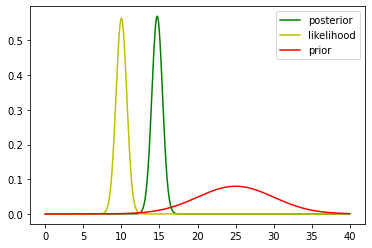

In [224]:
x_axis = np.arange(0, 40, 0.01)                 # Plot between -10 and 40 with .001 steps.
  

mean_1 = 10                                     # Calculated mean and standard deviation for posterior and likelihood
sd_1   = 1/np.sqrt(2)
mean_2 = 105/np.sqrt(51)
sd_2 = mean_2/21

fig,ax=plt.subplots(1,1)
  
ax.plot(x_axis, norm.pdf(x_axis, mean_2, sd_2),'g',label='posterior')
ax.plot(x_axis, norm.pdf(x_axis, mean_1, sd_1),'y',label='likelihood')
ax.plot(x_axis, norm.pdf(x_axis, 25, 5),'r',label='prior')

ax.legend()

**Ans2b**

In [225]:
def metropolis_algo(jump_sd,prior,likelihood,iter):
    arr = np.zeros((iter))
    arr[0] = 10
    for i in range(iter-1):
        arr[i+1] = np.random.normal(arr[i],jump_sd,1)
        r = prior(arr[i+1])*likelihood(arr[i+1])/(prior(arr[i])*likelihood(arr[i]))
        if np.random.uniform(0,1) > r :
            arr[i+1] = arr[i]

    print(arr)
    plt.hist(arr,bins=np.linspace(0,50,1000))
    plt.show()